In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
#Esta linea peemite que los graficos sean renderizados directamente en nuestro notebook
%matplotlib inline

# Preparación de los datos

#### Cargar un dataframe de la base de datos

In [3]:
movies = pd.read_csv('./peliculasDataMala.csv',encoding='utf-8')
movies

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN
5,John Carter,2012.0,Color,2.35,132.0,English,USA,132.0,Action|Adventure|Sci-Fi,PG-13,alien|american civil war|male nipple|mars|prin...,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,1873,263700000.0,6.6,73058679.0
6,Spider-Man 3,2007.0,Color,2.35,156.0,English,USA,156.0,Action|Adventure|Romance,PG-13,sandman|spider man|symbiote|venom|villain,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,46055,258000000.0,6.2,336530303.0
7,Tangled,2010.0,Color,1.85,100.0,English,USA,100.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,PG,17th century|based on fairy tale|disney|flower...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,2036,260000000.0,7.8,200807262.0
8,Avengers: Age of Ultron,2015.0,Color,2.35,141.0,English,USA,141.0,Action|Adventure|Sci-Fi,PG-13,artificial intelligence|based on comic book|ca...,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,92000,250000000.0,7.5,458991599.0
9,Harry Potter and the Half-Blood Prince,2009.0,Color,2.35,153.0,English,UK,153.0,Adventure|Family|Fantasy|Mystery,PG,blood|book|love|potion|professor,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,58753,250000000.0,7.5,301956980.0


In [4]:
# Visualizar las primeras filas
display(movies.head())
# Visualizar las ultimas filas
display(movies.tail())

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
5038,Signed Sealed Delivered,2013.0,Color,NaN,87.0,English,Canada,87.0,Comedy|Drama,NaN,fraud|postal worker|prison|theft|trial,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,2283,NaN,7.7,NaN
5039,The Following,NaN,Color,16.00,43.0,English,USA,43.0,Crime|Drama|Mystery|Thriller,TV-14,cult|fbi|hideout|prison escape|serial killer,NaN,Natalie Zea,Valorie Curry,Sam Underwood,1753,NaN,7.5,NaN
5040,A Plague So Pleasant,2013.0,Color,NaN,76.0,English,USA,76.0,Drama|Horror|Thriller,NaN,NaN,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,0,1400.0,6.3,NaN
5041,Shanghai Calling,2012.0,Color,2.35,100.0,English,USA,100.0,Comedy|Drama|Romance,PG-13,NaN,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,2386,NaN,6.3,10443.0
5042,My Date with Drew,2004.0,Color,1.85,90.0,English,USA,90.0,Documentary,PG,actress name in title|crush|date|four word tit...,Jon Gunn,John August,Brian Herzlinger,Jon Gunn,163,1100.0,6.6,85222.0


In [5]:
#Determinar el type
display(type(movies))
#Determinar las dimensiones del dataframe
display(movies.shape)

pandas.core.frame.DataFrame

(5043, 19)

In [6]:
# Visualizar las columnas del dataframe
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [7]:
# Determinar los indices
# Comienza desde el 0 y termina en el 5043 con una dimension
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [8]:
# Acceder a columnas como una lista
column1 = movies['movie_title']
column1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [9]:
# Acceder a las lineas como numpy
# Acceder a la linea 10 tomando todas sus columnas
linea = movies.loc[10,:]
linea

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [10]:
# Accediendo a todas las filas pero tomando solo los nombres de las columnas
movies.loc[:,'movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

#### Exploración de datos


In [11]:
# Determinemos la información que el dataframe nos puede mostrar
# Panda nos permite cargar una "mezcal de tipos de datos", a 
# diferenceua de numpy que permite cargar con un solo tipo de datos 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
movie_title                  5043 non-null object
title_year                   4935 non-null float64
color                        5024 non-null object
aspect_ratio                 4714 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
duration.1                   5028 non-null float64
genres                       5043 non-null object
content_rating               4740 non-null object
plot_keywords                4890 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
cast_total_facebook_likes    5043 non-null int64
budget                       4551 non-null float64
imdb_score                   5043 non-n

In [12]:
# Que columnas son numericas
movies.dtypes == 'float64'

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [13]:
# Que columnas son numericas
movies.dtypes == 'int64'

movie_title                  False
title_year                   False
color                        False
aspect_ratio                 False
duration                     False
language                     False
country                      False
duration.1                   False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [14]:
# Que columnas son de texto
c_text = (movies.dtypes == object)
c_text

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [15]:
# Ten encuenta todos los tipos de datos numericos como float, int ....
# En muchos casos poner == int sale resultados inesperados, pon el tipo con su formato int 32, int64, los mismo con los float
# Que columnas son numericas
c_num = (movies.dtypes == 'float64') | (movies.dtypes == 'int64')
c_num

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [16]:
# columnas son de texto
for i in c_num.index:
    print(i)

movie_title
title_year
color
aspect_ratio
duration
language
country
duration.1
genres
content_rating
plot_keywords
director_name
actor_1_name
actor_2_name
actor_3_name
cast_total_facebook_likes
budget
imdb_score
gross


In [17]:
# Extraemos las columnas que son de tipo numerico
num_column = [n for n in c_num.index if c_num[n]]
num_column

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [18]:
# Extraemos las columnas que son de tipo texto
text_column = [t for t in c_text.index if c_text[t]]
text_column

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

#### Inspección cuantitativa y de salud de los datos

In [19]:
#Creamos un nuevo dataframe con solo las columnas numericas
datafram_numerico = movies[num_column]
datafram_numerico.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


In [20]:
# Miremos la estadistica de cada columna
# count = el total, mean = es la media, std es la desviación estandar, min el minimo valor
# 25% 50% 75% Son los cuartiles
# max es el valor maximo
datafram_numerico.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


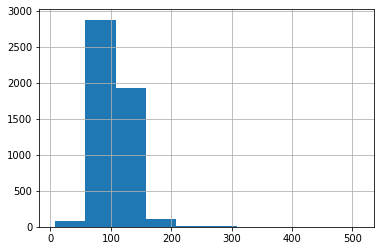

In [21]:
#estadistica de la duración de la pelicula
datafram_numerico['duration'].hist()

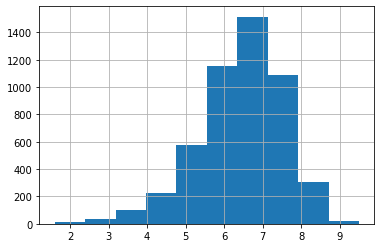

In [22]:
datafram_numerico['imdb_score'].hist()

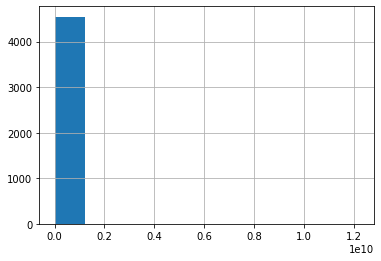

In [23]:
datafram_numerico['budget'].hist()

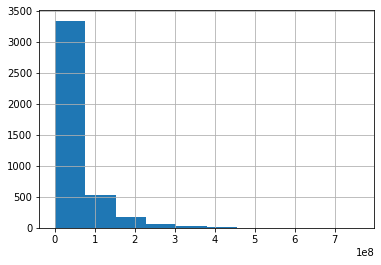

In [24]:
datafram_numerico['gross'].hist()

Para poder debuggear esta situación utilizaremos una tecnica muy tipica de pandas que se llama **boolean filtering**. Basicamente construimos una serie de booleanos con el mismo indice que nuestro dataframe (la serie clasicamente la llamaremos mask). 

In [25]:
(datafram_numerico['budget'] > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [26]:
mask = (datafram_numerico['budget'] > 1e9)

In [27]:
#La mascara extrae las 6 peliculas cuyo presupuesto es superior al billon
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


Tenemos un lio de limpieza de los datos. La BDD anterior fue creada sin diferenciae la moneda en la que se ingresa el presupuesto y el ingreso. La zona(pais/mundial) en la que el registro el ingreso

Para cuestiones del proyecto, usaremos una base de datos nueva que prevee el problema anterior ---> Importar BBDD thenumbers.com

In [28]:
data_good = pd.read_csv('./peliculasDataBuena.csv',encoding='utf-8')
data_good.head()         

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises


In [29]:
# Extraemos las columnas que nos interesa para realizar un merge con la base de datos anterior
financials_data = data_good[['movie_title','production_budget','worldwide_gross']]

In [30]:
financials_data.shape

(4341, 3)

In [31]:
datafram_numerico.shape

(5043, 8)

In [32]:
movies.shape

(5043, 19)

Perdere 702 datos. No es lo ideal, pero es preferible a tener datos sucios, si pierdo mas del 70% es una situación grave

In [33]:
#Agregar la misma llave al datafram_numerico para hacer un join
datafram_numerico = pd.concat([datafram_numerico,movies['movie_title']],axis=1)
#datafram_numerico.drop(['movie_title'],axis=1,inplace=True)
datafram_numerico.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...


In [34]:
#Hacemos el merge entre las bases de datos
#Descartara las filas que no esten en ambas bases
datafram_numerico2 = pd.merge(financials_data,datafram_numerico,on='movie_title',how='left')

In [35]:
datafram_numerico2.shape

(4385, 11)

In [36]:
datafram_numerico2.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


In [37]:
# El profesor se le olvido explicar esto, pero hace merge con otra base de datos
gross_opening = pd.read_csv('./opening_df.csv')
#Eliminaremos la columna  	Unnamed: 0
gross_opening = gross_opening.drop('Unnamed: 0',axis=1)
gross_opening.head()

,movie_title,opening_gross,screens
0,10 Days in a Madhouse,2451.0,10.0
1,10 Things I Hate About You,8330681.0,2271.0
2,102 Dalmatians,19883351.0,2704.0
3,12 Rounds,5329240.0,2331.0
4,12 Years a Slave,923715.0,19.0


In [38]:
#Le hacemos un merge a nuestro dataframe
datafram_numerico2 = pd.merge(datafram_numerico2,gross_opening,on='movie_title',how='left')
datafram_numerico2.tail()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
4380,The Mongol King,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN,NaN,NaN
4381,Signed Sealed Delivered,5000,0,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN,NaN,NaN
4382,Shanghai Calling,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0,NaN,NaN
4383,A Plague So Pleasant,1400,0,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN,NaN,NaN
4384,My Date with Drew,1100,181041,2004.0,1.85,90.0,90.0,163,1100.0,6.6,85222.0,NaN,NaN


Los datos faltantes generan problemas con muchos algoritmos de ML. Es por esto que existen distintas estrategias para lidiar con ellos

In [39]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : boolean, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : boolean, default True
        Sort by values.
    ascending : boolean, default False
        Sort in ascending order.
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : boolean, default True
        Don't include counts of NaN.
    
    Returns
    -------
    counts : Series
    
    See Also
    --------
    S

In [40]:
datafram_numerico2.notnull().head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False,False,False
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True


In [41]:
#Miramos en un nuevo dataframe booleano si hay valores no nulos y distintos a  0
available = ((datafram_numerico2 !=0) & (datafram_numerico2.notnull()))
available.head()


,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False,False,False
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True


In [42]:
#Cuenta por todas las columnas del dataframe booleano cuantos valores cumplen la condición anterior
available.all(axis=1).value_counts()

False    2252
True     2133
dtype: int64

In [43]:
#Mira columna x columna (apply es como una iteración) la cantidad de valores que cumplen o no la condición 
datafram_numerico2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,opening_gross,screens
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671,2106,2164
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714,2279,2221


In [44]:
# Miramos si nuestra varible objetivo esta disponible worldwide_gross
mask2 = available['worldwide_gross']
mask2

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
4355     True
4356     True
4357     True
4358     True
4359     True
4360     True
4361     True
4362    False
4363    False
4364     True
4365    False
4366    False
4367    False
4368    False
4369     True
4370     True
4371    False
4372     True
4373     True
4374     True
4375     True
4376     True
4377     True
4378     True
4379     True
4380     True
4381    False
4382     True
4383    False
4384     True
Name: worldwide_gross, Length: 4385, dtype: bool

In [45]:
datafram_numerico2 = datafram_numerico2[mask2]

In [46]:
#Nuestra variable objetivo esta limpia
((datafram_numerico2 != 0) & (datafram_numerico2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

In [47]:
# Eliminaremos la columna movie_title, ya que no nos sirve para el estudio
datafram_numerico2 = datafram_numerico2.drop('movie_title',axis=1)

In [48]:
# Eliminamos la columna duplicada
datafram_numerico2 = datafram_numerico2.drop('duration.1',axis=1)

In [49]:
# Por cuestiones del ejercicio, se ha decidido no tener encuenta las siguientes columnas
datafram_numerico2 = datafram_numerico2.drop('gross',axis=1)
datafram_numerico2 = datafram_numerico2.drop('opening_gross',axis=1)
datafram_numerico2 = datafram_numerico2.drop('screens',axis=1)

In [50]:
datafram_numerico2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5


In [51]:
#sklearn nos ofrece un molulo preprocessing que nos ayudara a gestionar los datos faltantes
#Consideramos como faltantes los datos que aparecen en el dataframe como nan
#La estrategia es remplazar los valores con el promedio de la columna. Existen mas estrategias en la doc de sklearn
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [52]:
# Se aplico la estrategia de modificar en los campos NAN el promedio de cada columna
values = imputer.fit_transform(datafram_numerico2)


In [53]:
datafram_numerico2.values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        4.83400000e+03, 2.37000000e+08, 7.90000000e+00],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
        1.43000000e+02,            nan, 7.10000000e+00],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        4.83500000e+04, 3.00000000e+08, 7.10000000e+00],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        9.30000000e+01, 3.25000000e+03, 7.80000000e+00],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        2.38600000e+03,            nan, 6.30000000e+00],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.63000000e+02, 1.10000000e+03, 6.60000000e+00]])

In [54]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        4.83400000e+03, 2.37000000e+08, 7.90000000e+00],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        1.43000000e+02, 4.04553863e+07, 7.10000000e+00],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        4.83500000e+04, 3.00000000e+08, 7.10000000e+00],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        9.30000000e+01, 3.25000000e+03, 7.80000000e+00],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        2.38600000e+03, 4.04553863e+07, 6.30000000e+00],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.63000000e+02, 1.10000000e+03, 6.60000000e+00]])

In [55]:
x = pd.DataFrame(values)
x.columns = datafram_numerico2.columns
x.index = datafram_numerico2.index
x

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
5,275000000.0,2.600021e+08,2013.000000,2.350000,150.000000,45757.0,2.150000e+08,6.5
6,275000000.0,2.827781e+08,2012.000000,2.350000,132.000000,1873.0,2.637000e+08,6.6
7,260000000.0,5.865819e+08,2010.000000,1.850000,100.000000,2036.0,2.600000e+08,7.8
8,258000000.0,8.908753e+08,2007.000000,2.350000,156.000000,46055.0,2.580000e+08,6.2
9,258000000.0,8.908753e+08,2007.000000,2.350000,156.000000,46055.0,2.580000e+08,6.2


In [56]:
# Guardamos el data limpio
x.to_csv('dataEntreno.csv',index=False)